## Análisis espacial de las bases

#### BASES BICIMAD

Datos de las bases del servicio público de bicicleta eléctrica de la ciudad de Madrid.


Ultima actualización de los datos: 27/08/2018


* **Número**: Número de identificación de la estación
* **Gis_X**: Longitud en el sistema de coordenadas EPSG23030 (UTM 30N)
* **Gis_Y**: Latitud en el sistema de coordenadas EPSG23030 (UTM 30N)
* **Fecha de Alta**: Fecha de alta de la estación
* **Distrito**: Distrito de Madrid en el que se situa
* **Barrio**: Barrio de Madrid en el que se sitúa
* **Calle**: Calle en la que se sitúa
* **Nº Finca**: Número de calle
* **Tipo de Reserva**: Tipo de reserva al que pertenece
* **Número de Plazas**: Numero máximo de puestos de carga y aparcamiento de la estación
* **LONGITUD**: Longitud en el sistema de coordenadas EPSG4326 (WGS84)
* **LATITUD**: Latitud en el sistema de coordenadas EPSG4326 (WGS84)
* **DIRECCION**: Dirección completa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# relative paths
PATH_BASES = '../../data/raw/bases_bicimad.csv'
df_bases = pd.read_csv(PATH_BASES, encoding = "ISO-8859-1", delimiter=';')

In [25]:
df_bases.head()

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION
0,001a,"440394,55","4474280,53",41813,01 CENTRO,01-06 SOL,"PUERTA DEL SOL, PLAZA, DE LA",1 B,BiciMAD,24,-3.702575,40.417016,"PUERTA DEL SOL, PLAZA, DE LA,1 B"
1,001b,"440404,21","4474287,39",41813,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",1,BiciMAD,24,-3.702462,40.417078,"ALCALA, CALLE, DE,1"
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,27,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE,1"
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL,2"
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,27,-3.702674,40.428591,"MANUELA MALASAÑA, CALLE, DE,3"


In [26]:
# transformacion de los campos ['Gis_X', 'Gis_Y'] a valores numéricos para su posterior análisis [TODO]
df_bases['Gis_X'] = pd.to_numeric(df_bases['Gis_X'].str.replace(",", "."), downcast="float")
df_bases['Gis_Y'] = pd.to_numeric(df_bases['Gis_Y'].str.replace(",", "."), downcast="float")

In [27]:
df_bases.describe()

,Gis_X,Gis_Y,Fecha de Alta,Número de Plazas,LONGITUD,LATITUD
count,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000
mean,441024.937500,4.475038e+06,41927.191860,24.401163,-3.695216,40.423888
std,1132.566895,1.555236e+03,222.186617,3.974568,0.013346,0.014014
min,438517.062500,4.471608e+06,41813.000000,6.000000,-3.724873,40.392973
25%,440249.382812,4.473965e+06,41813.000000,24.000000,-3.704326,40.414122
50%,441011.265625,4.474917e+06,41813.000000,24.000000,-3.695452,40.422800
75%,441767.140625,4.475770e+06,42175.000000,24.000000,-3.686522,40.430440
max,443230.000000,4.478963e+06,43291.000000,67.000000,-3.669099,40.459282


- Coordenadas['Gis_X', 'Gis_Y', 'LONGITUD', 'LATITUD']: Realizar análisis geo posterior.
- Fecha de alta ['Fecha de Alta']: Todos los campos continen valores intuitivamente esperables, a excepción del campo "Fecha de alta". Haciendo una búsqueda en el portal de datos abierto del Ayuntamiento de Madrid (https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=d67921bb86e64610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) no encontramos información referente a este campo. Tampoco se puede inferir de qué manera los valores que toman las filas en ese campo "Fecha de alta" pueden mapearse a una fecha (como se ve en el análisis previo, los valores se encuentran en [41813-43291]) . Asimismo, la fecha de alta de la estación no es un campo que aporte información muy útil, a priori. Por todas estas razones, descartamos este campo.
- Número de plazas ['Número de plazas']: La mayoría de las estaciones tiene 24 plazas. [continuar análisis]

In [28]:
df_bases['Distrito'].unique()

array(['01  CENTRO', '07  CHAMBERÍ', '09  MONCLOA-ARAVACA',
       '02  ARGANZUELA', '03  RETIRO', '04  SALAMANCA', '06  TETUÁN',
       '05  CHAMARTÍN'], dtype=object)

In [29]:
pd.DataFrame(df_bases.groupby(['Distrito']).size().reset_index(name='count').sort_values(by='count', ascending=False))

,Distrito,count
0,01 CENTRO,61
3,04 SALAMANCA,27
2,03 RETIRO,24
6,07 CHAMBERÍ,19
4,05 CHAMARTÍN,13
1,02 ARGANZUELA,11
7,09 MONCLOA-ARAVACA,10
5,06 TETUÁN,7


In [30]:
pd.DataFrame(df_bases.groupby(['Distrito', 'Barrio']).size().reset_index(name='count'))

,Distrito,Barrio,count
0,01 CENTRO,01-01 PALACIO,10
1,01 CENTRO,01-02 EMBAJADORES,11
2,01 CENTRO,01-03 CORTES,7
3,01 CENTRO,01-04 JUSTICIA,11
4,01 CENTRO,01-05 UNIVERSIDAD,11
5,01 CENTRO,01-06 SOL,11
6,02 ARGANZUELA,02-01 IMPERIAL,1
7,02 ARGANZUELA,02-02 ACACIAS,4
8,02 ARGANZUELA,02-03 CHOPERA,1
9,02 ARGANZUELA,02-05 DELICIAS,1


#### Número de plazas en cada base:

Text(0.5, 1.0, 'Número de plazas en las bases')

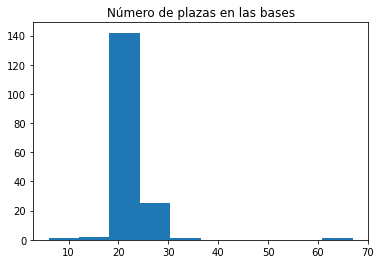

In [31]:
plt.hist(df_bases['Número de Plazas'], bins=10)
plt.title('Número de plazas en las bases')

In [67]:
df_bases[df_bases['Número de Plazas'] == 67]

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION


La mayoría de las bases tiene 24 plazas. Existe una estación que aparece con 67 plazas (Calle de Almadén). Vemos que su número de identificación es 67, por lo que probablemente el número de plazas se trate de error. Lo corregimos (a 24, el valor típico):

In [65]:
idx_67 = df_bases.index[df_bases['Número de Plazas'] == 67]
df_bases.loc[idx_67, 'Número de Plazas'] = 24

In [69]:
df_bases['Número de Plazas'].describe()

count    172.000000
mean      24.151163
std        2.263452
min        6.000000
25%       24.000000
50%       24.000000
75%       24.000000
max       36.000000
Name: Número de Plazas, dtype: float64

#### Tipo de reserva

In [70]:
df_bases['Tipo de Reserva'].unique()

array(['BiciMAD'], dtype=object)

Sólo toma el valor "BiciMAD"

#### Geolocalización de cada base

In [54]:
bounding_box = [
    df_bases['LONGITUD'].min(), df_bases['LONGITUD'].max(),
    df_bases['LATITUD'].min(), df_bases['LATITUD'].max()
]

In [56]:
PATH_MAP = '../../imgs/map.png'
map_madrid = plt.imread(PATH_MAP)

In [96]:
df_bases['Distrito_numeric'] = df_bases['Distrito'].str[1:2].astype(int)

In [97]:
df_bases

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION,Distrito_numeric
0,001a,"440394,55","4474280,53",41813,01 CENTRO,01-06 SOL,"PUERTA DEL SOL, PLAZA, DE LA",1 B,BiciMAD,24,-3.702575,40.417016,"PUERTA DEL SOL, PLAZA, DE LA,1 B",1
1,001b,"440404,21","4474287,39",41813,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",1,BiciMAD,24,-3.702462,40.417078,"ALCALA, CALLE, DE,1",1
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,27,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE,1",1
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL,2",7
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,27,-3.702674,40.428591,"MANUELA MALASAÑA, CALLE, DE,3",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,163,"440055,04","4472797,85",42186,02 ARGANZUELA,02-02 ACACIAS,"ESPERANZA, PASEO, DE LA",NaN,BiciMAD,24,-3.706437,40.403635,"ESPERANZA, PASEO, DE LA,",2
168,164,"441064,15","4472071,33",42186,02 ARGANZUELA,02-05 DELICIAS,"DELICIAS, PASEO, DE LAS",92,BiciMAD,24,-3.694479,40.397162,"DELICIAS, PASEO, DE LAS,92",2
169,165,"440779,23","4471608,61",42186,02 ARGANZUELA,02-03 CHOPERA,"CHOPERA, PASEO, DE LA",47,BiciMAD,24,-3.697793,40.392973,"CHOPERA, PASEO, DE LA,47",2
170,166,"439477,71","4473947,39",42544,01 CENTRO,01-01 PALACIO,"SEGOVIA, CALLE, DE",26,BiciMAD,24,-3.713350,40.413949,"SEGOVIA, CALLE, DE,26",1


In [1]:
fig, ax = plt.subplots(figsize=(20,20))
points = ax.scatter(df_bases['LONGITUD'], df_bases['LATITUD'], zorder=1, alpha=1, s=200, c='black')#c=df_bases['Distrito'].str[1:2].astype(int), cmap='plasma')
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])
ax.imshow(map_madrid, extent=bounding_box, aspect='equal')

NameError: name 'plt' is not defined

Mapa mal ajustado, [TODO] Mirar

Cálculo de la distancia entre dos bases:

La solución óptima sería acceder a la API de Google Maps para calcular la distancia (en bici) entre dos estaciones, para luego analizar las distancias recorridas en los diferentes trayectos de los que disponemos. Como solución aproximada, usamos la siguiente distancia:

In [71]:
def haversine_distance(src_latitude, src_longitude, dst_latitude, dst_longitude):
    r = 6371
    phi1 = np.radians(src_latitude)
    phi2 = np.radians(dst_latitude)
    delta_phi = np.radians(dst_latitude - src_latitude)
    delta_lambda = np.radians(dst_longitude - src_longitude)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [72]:
(long_001a, lat_001a) = (df_bases[df_bases['Número'] == '001a'].loc[:,'LONGITUD'].item(), df_bases[df_bases['Número'] == '001a'].loc[:,'LATITUD'].item()) # Pta del Sol
(long_4, lat_4) = (df_bases[df_bases['Número'] == '4'].loc[:,'LONGITUD'].item(), df_bases[df_bases['Número'] == '4'].loc[:,'LATITUD'].item()) # Manuela Malasaña, 3

In [73]:
haversine_distance(long_001a, lat_001a, long_4, lat_4)

1.28

La distancia calculada por nuestra función es de 1.28 km, mientras que la distancia que nos proporciona Google Maps para este camino en bici es alrededor de 1.7 km. 